In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [2]:
def gen_tmorlet2(M: int, s: float, w: float = 5):
    '''
    Generate a truncated complex Morlet wavelet with the given parameters.

    Parameters
    ----------
    M : int
        Length of the wavelet.
    s : float
        Width parameter of the wavelet.
    w : float, optional
        Omega0. Default is 5

    Returns
    -------
    morlet : (M,) ndarray
    '''

    M2 = M * 2

    x = np.arange(0, M2) - (M2 - 1.0) / 2
    x = x / s
    wavelet = np.exp(1j * w * x) * np.exp(-0.5 * x**2) * np.pi**(-0.25)
    output = np.sqrt(1 / s) * wavelet

    return output[:M]
    

Text(0.5, 0, 'Time (s)')

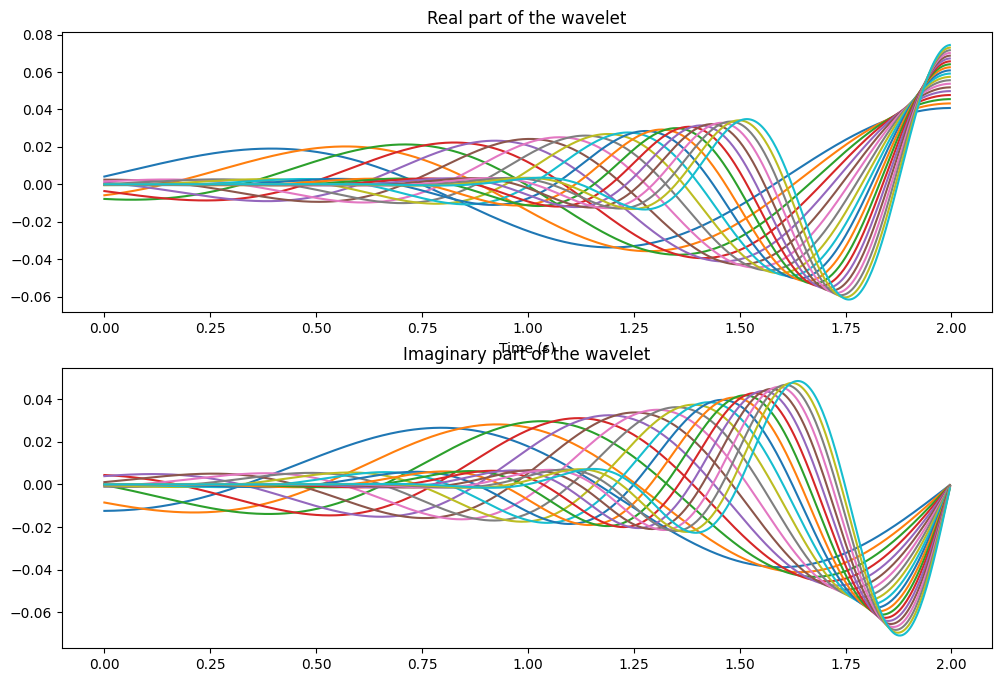

In [5]:
fs = 256
analysis_sp = 2*fs
wavelet_freqs = np.linspace(0.6, 2.0, 20)

M = int(analysis_sp)
w = 5
s = lambda f: w * fs / (2 * pi * f)
wavelet = [gen_tmorlet2(M, s(f), w) for f in wavelet_freqs]

hf, hax = plt.subplots(2, 1, figsize=(12, 8))
for i, w in enumerate(wavelet):
    hax[0].plot(np.arange(M) / fs, np.real(w), label=f'{wavelet_freqs[i]:.2f} Hz')
hax[0].set_title('Real part of the wavelet')

for i, w in enumerate(wavelet):
    hax[1].plot(np.arange(M) / fs, np.imag(w), label=f'{wavelet_freqs[i]:.2f} Hz')
hax[1].set_title('Imaginary part of the wavelet')
hax[0].set_xlabel('Time (s)')
